In [ ]:
import numpy as np

In [ ]:
#!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
import json
token = {"username":"shagunjain","key":"2d5141108126adc03e6b6131240e4965"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list

In [ ]:
#!kaggle datasets list -s sentiment

In [ ]:
!kaggle competitions download -c facial-keypoints-detection -p /content

 31% 5.00M/16.0M [00:00<00:00, 13.9MB/s]
100% 16.0M/16.0M [00:00<00:00, 39.5MB/s]
 70% 42.0M/60.1M [00:00<00:00, 36.1MB/s]
100% 60.1M/60.1M [00:00<00:00, 82.3MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 112MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 176MB/s]


In [ ]:
!unzip \*.zip

Archive:  test.zip
  inflating: test.csv                

Archive:  training.zip
  inflating: training.csv            

2 archives were successfully processed.


In [ ]:
import pandas as pd
d = pd.read_csv('training.csv')
d.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
d.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b



```
# This is formatted as code
```

for i in range(0,len(d['Image'])):
  d['Image'][i] = d['Image'][i].apply()

In [ ]:
# Since values for the image is given as space separated string, we will need to separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
'''
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))
# Let's obtain the shape of the resized image
facialpoints_df['Image'][1].shape
(96, 96)
# Let's confirm that there are no null values 
# Plot a random image from the dataset along with facial keypoints. 
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')

'''

def convert_string_to_image(x):
  x = np.fromstring(x,dtype=int,sep=' ').reshape(96,96)
  return(x)

In [ ]:
for i in range(len(d['Image'])):
  d['Image'][i]= convert_string_to_image(d['Image'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
y = d['Image'][0]

In [ ]:
y.shape

(96, 96)

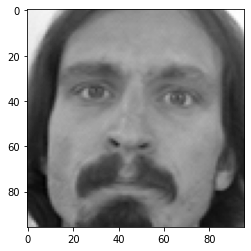

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(d['Image'][0],cmap='gray')

In [ ]:
data = d.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
data1 = data.reset_index()
# To Reset the index 

In [ ]:
data1.drop('index',inplace=True,axis=1)

In [ ]:
data1.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


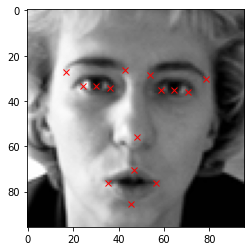

In [ ]:

plt.imshow(data1["Image"][1],cmap='gray')
for j in range(1,31,2):
  plt.plot(data1.loc[1][j-1],data1.loc[1][j],'rx')

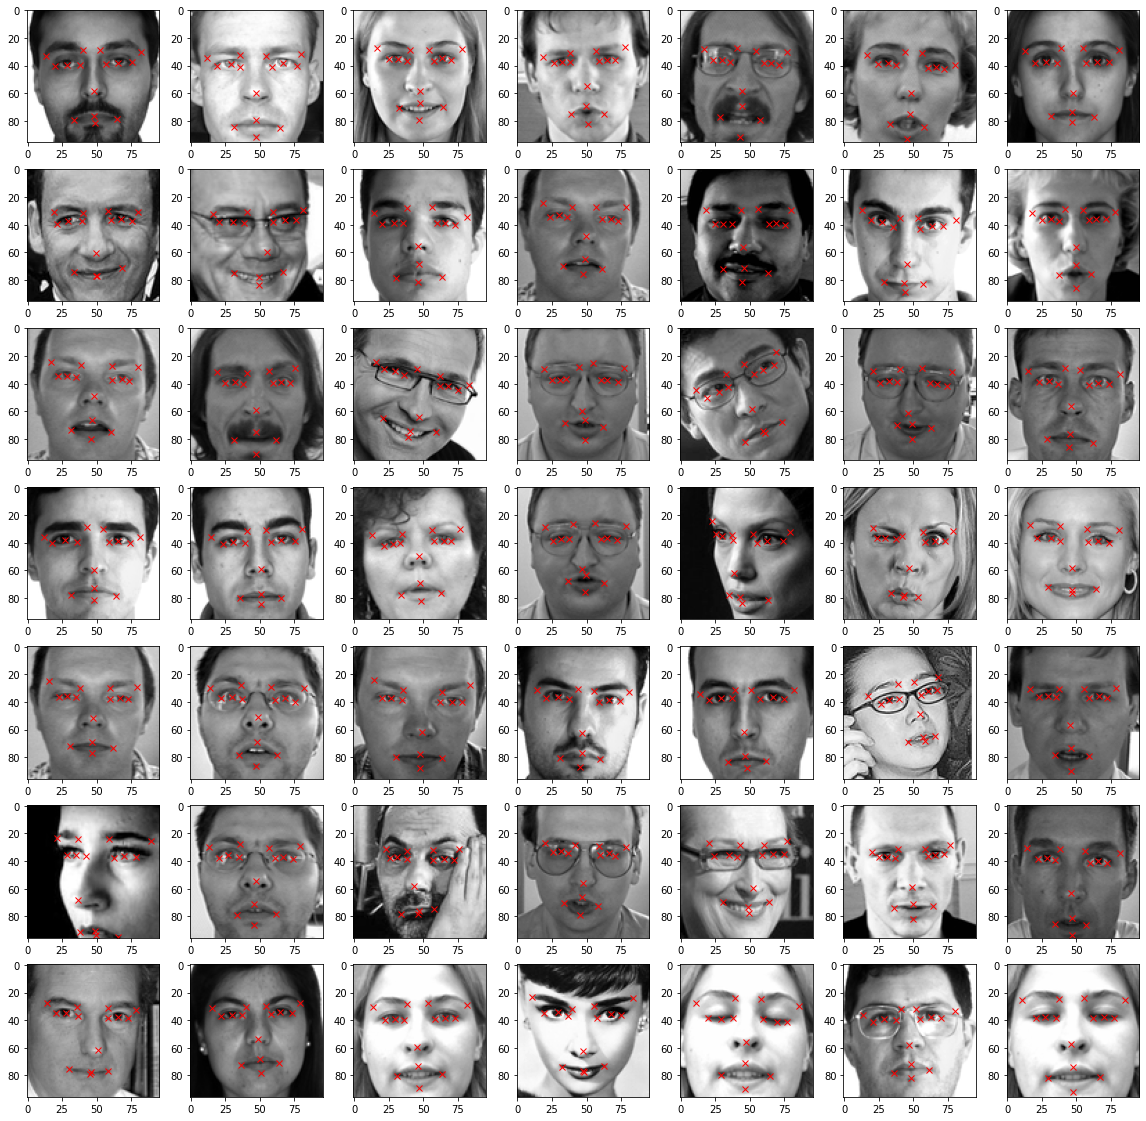

In [ ]:
# Let's view more images in a grid format
import random
fig = plt.figure(figsize=(20, 20))
for i in range(49):
    ax = fig.add_subplot(7, 7, i + 1)   
    n = random.randint(0,2100) 
    image = plt.imshow(data1['Image'][n], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(data1.loc[n][j-1],data1.loc[n][j], 'rx')
    

In [ ]:
data1['Image'][1741]

array([[161, 123, 154, ..., 116, 109, 107],
       [188, 138, 152, ..., 163, 151, 115],
       [185, 143, 162, ..., 215, 209, 161],
       ...,
       [190, 190, 192, ..., 186, 185, 183],
       [189, 189, 190, ..., 184, 182, 181],
       [188, 188, 189, ..., 182, 179, 178]])

In [ ]:
data1.tail()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,"[[191, 191, 191, 190, 189, 185, 184, 120, 54, ..."
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,"[[19, 19, 19, 18, 13, 7, 3, 4, 3, 1, 3, 9, 11,..."
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,"[[31, 40, 47, 31, 54, 58, 63, 100, 86, 80, 82,..."
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,"[[7, 1, 5, 1, 3, 20, 12, 0, 5, 8, 6, 18, 13, 9..."
2139,66.683755,34.483429,30.784490,38.578939,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,49.973878,59.269388,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,52.923371,82.661062,"[[68, 19, 19, 23, 19, 26, 23, 16, 8, 15, 9, 9,..."


In [ ]:
# Now Removal of null values task is complete 
# We also tried the some images with their facial keypoints

**Image Augmentation**

In [ ]:
# So in augmentation we can try more than 10 operation 
# I will try horizontal flipping, vertical flipping and brightness increase
# we can do alot more and we will do if needed

In [ ]:
import copy
data_copy= copy.copy(data1)

In [ ]:

columns =data_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# Now flip the image column horizontally 
data_copy['Image'] =data_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

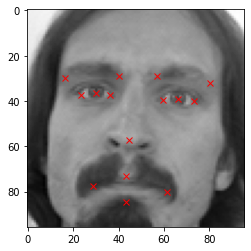

In [ ]:
plt.imshow(data['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(data_copy.loc[0][j-1],data_copy.loc[0][j],'rx')

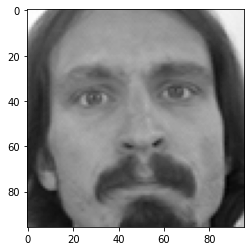

In [ ]:
plt.imshow(data_copy['Image'][0],cmap='gray')

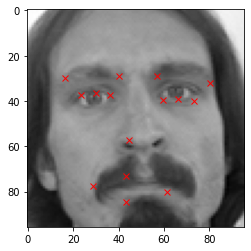

In [ ]:
# Let's plot garbage hehehehe
plt.imshow(data_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(data_copy.loc[0][j-1],data_copy.loc[0][j],'rx')

# So now  we  can see that we have to update the keypoints as well

In [ ]:
# So next task is to change the keypoints according to image
for i in range(len(columns)):
  if i%2==0:
    # x co-ordinate
    data_copy[columns[i]] = data_copy[columns[i]].apply(lambda x: 96- float(x))

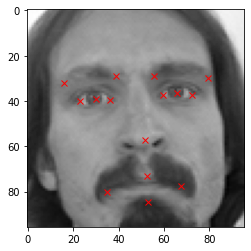

In [ ]:
plt.imshow(data_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(data_copy.loc[0][j-1],data_copy.loc[0][j],'rx')


In [ ]:
# Let's flip vertically

data_copy_vertical = copy.copy(data1)

In [ ]:
data_copy_vertical['Image'] =data_copy_vertical['Image'].apply(lambda y: np.flip(y, axis = 0))

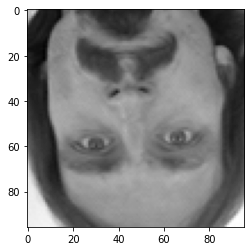

In [ ]:
plt.imshow(data_copy_vertical['Image'][0],cmap='gray')

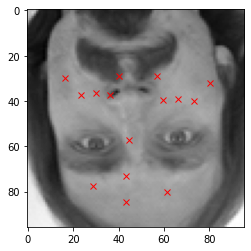

In [ ]:
# Let's plot garbage hehehehe
plt.imshow(data_copy_vertical['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(data_copy_vertical.loc[0][j-1],data_copy_vertical.loc[0][j],'rx')

# So now  we  can see that we have to update the keypoints as well

In [ ]:
# So next task is to change the keypoints according to image
for i in range(len(columns)):
  if i%2!=0:
    # x co-ordinate
    data_copy_vertical[columns[i]] = data_copy_vertical[columns[i]].apply(lambda x: 96- float(x))

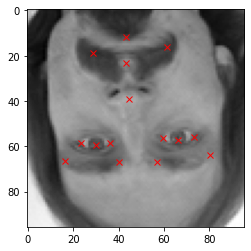

In [ ]:
# Let's plot garbage hehehehe
plt.imshow(data_copy_vertical['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(data_copy_vertical.loc[0][j-1],data_copy_vertical.loc[0][j],'rx')

# So now  we  can see that we have to update the keypoints as well

In [ ]:
data_augmented = np.concatenate((data1,data_copy,data_copy_vertical))

In [ ]:
data_augmented.shape

(6420, 31)

In [ ]:
data_brightness = copy.copy(data1)

In [ ]:
# let's increase the brightness 
data_brightness['Image'] = data_brightness['Image'].apply(lambda x: np.clip(random.uniform(1,2)*x,0.0,255.0))

# As we do not change the position of pixels so there is no need to change the keypoints

In [ ]:
data_augmented = np.concatenate((data_augmented,data_brightness))
data_augmented.shape

(8560, 31)

**Image Processing**

In [ ]:
img = data_augmented[:,30]
img = img/255.0

In [ ]:
len(img)

8560

In [ ]:
x = np.empty((len(img),96,96,1))



In [ ]:
x.shape

(8560, 96, 96, 1)

In [ ]:
for i in range(len(img)):
  x[i,] = np.expand_dims(img[i], axis=2)
x = np.asarray(x).astype(np.float32)
x.shape

(8560, 96, 96, 1)

In [ ]:
y = data_augmented[:,:30]
y = np.asarray(y).astype(np.float32)

In [ ]:
y.shape

(8560, 30)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.1)

In [ ]:
xtrain[0]

array([[[0.19440489],
        [0.27445394],
        [0.4402699 ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.22871162],
        [0.245865  ],
        [0.37737417],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.245865  ],
        [0.18868709],
        [0.33734965],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]], dtype=float32)

"\nimport random\nfig = plt.figure(figsize=(20, 20))\nfor i in range(49):\n    ax = fig.add_subplot(7, 7, i + 1)   \n    n = random.randint(0,2100) \n    image = plt.imshow(data1['Image'][n], cmap = 'gray')\n    for j in range(1,31,2):\n        plt.plot(data1.loc[n][j-1],data1.loc[n][j], 'rx')\n"

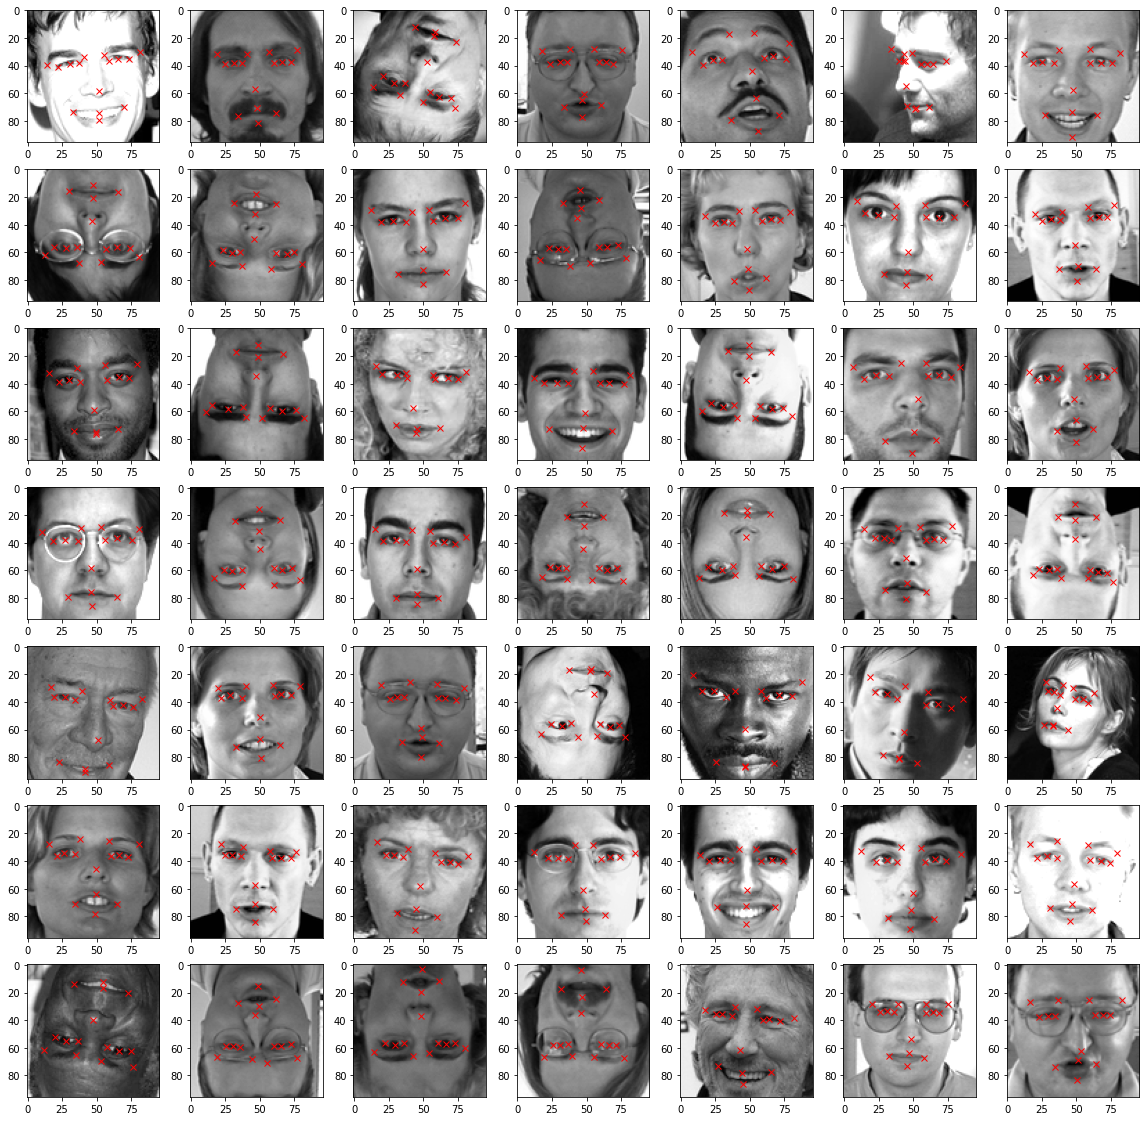

In [ ]:
# Lets plot Xtrain dataset
fig = plt.figure(figsize=(20,20))

for i in range(49):
  ax = fig.add_subplot(7,7,i+1)
  image = plt.imshow(xtrain[i].reshape(96,96), cmap='gray')
  for j in range(1,31,2):
    plt.plot(ytrain[i][j-1],ytrain[i][j],'rx')

'''
import random
fig = plt.figure(figsize=(20, 20))
for i in range(49):
    ax = fig.add_subplot(7, 7, i + 1)   
    n = random.randint(0,2100) 
    image = plt.imshow(data1['Image'][n], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(data1.loc[n][j-1],data1.loc[n][j], 'rx')
'''

**Residual Neural Network**

In [ ]:
# RES BLOCK - [ Input -> convolution block -> identity block -> identity block -> Output ]
#  Final Model - [Input -> Zero padding -> Conv2D -> BatchNormalization, Relu -> Maxpool2D -> RES BLOCK -> RES BLOCK -> AveragePooling2D -> flatten() ->
#                  Dense Layer, Relu , Dropout -> Dense Layer, Relu, Dropout -> Dense layer, relu ->> Output]

In [ ]:

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K

In [ ]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)
  # Now convolution block is complete


  # Identity block 1 

  X_copy = X
  # main path 
  X = Conv2D(1,(1,1), strides = (1,1), name='res'+str(stage)+'identity_1_a', kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'identity_1_a')(X)
  X = Activation('relu')(X) 
  
  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 
  
  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'identity_1c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'identity_1_c')(X)
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  
  # Identity block 2 

  X_copy = X
  # main path 
  X = Conv2D(1,(1,1), strides = (1,1), name='res'+str(stage)+'identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'identity_2_a')(X)
  X = Activation('relu')(X) 
  
  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity2_b')(X)
  X = Activation('relu')(X) 
  
  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'identity_2c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'identity_2_c')(X)
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X





In [ ]:
input_shape =(96,96,1)

x_input = Input(input_shape)
X = ZeroPadding2D((3,3))(x_input)
X = Conv2D(64, (7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPool2D((3,3), strides=(2,2))(X)

# stage 2
X = res_block(X, filter = [64,64,256], stage=2)

# stage3 
X = res_block(X,filter=[128,128,512], stage=3)

# Average pooling
X = AveragePooling2D((2,2), name='average_pooling')(X)

# Flatten
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation='relu')(X)

model = Model(inputs = x_input, outputs = X)
model.summary()




Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
adam=tf.keras.optimizers.Adam(learning_rate=0.001, 
                              beta_1=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(xtrain, ytrain, batch_size=16, epochs=100, validation_split=0.05, callbacks=[checkpointer] )

Epoch 1/100
458/458 [==============================] - ETA: 0s - loss: 241.5987 - accuracy: 0.5980
Epoch 00001: val_loss improved from inf to 209.10814, saving model to weights.hdf5
458/458 [==============================] - 7s 15ms/step - loss: 241.5987 - accuracy: 0.5980 - val_loss: 209.1081 - val_accuracy: 0.7306
Epoch 2/100
457/458 [============================>.] - ETA: 0s - loss: 138.6524 - accuracy: 0.6965
Epoch 00002: val_loss improved from 209.10814 to 129.15646, saving model to weights.hdf5
458/458 [==============================] - 6s 14ms/step - loss: 138.6043 - accuracy: 0.6965 - val_loss: 129.1565 - val_accuracy: 0.6813
Epoch 3/100
455/458 [============================>.] - ETA: 0s - loss: 124.1237 - accuracy: 0.7357
Epoch 00003: val_loss improved from 129.15646 to 106.49117, saving model to weights.hdf5
458/458 [==============================] - 6s 14ms/step - loss: 124.1720 - accuracy: 0.7365 - val_loss: 106.4912 - val_accuracy: 0.7617
Epoch 4/100
454/458 [=============

In [ ]:
'''model.compile(loss='mean_absolute_error', optimizer=adam,metrics=['accuracy'])

checkpointer1 = ModelCheckpoint(filepath = "weights1.hdf5", verbose = 1, save_best_only = True)

history1 = model.fit(xtrain, ytrain, batch_size=16, epochs=100, validation_split=0.05, callbacks=[checkpointer1] )'''

'model.compile(loss=\'mean_absolute_error\', optimizer=adam,metrics=[\'accuracy\'])\n\ncheckpointer1 = ModelCheckpoint(filepath = "weights1.hdf5", verbose = 1, save_best_only = True)\n\nhistory1 = model.fit(xtrain, ytrain, batch_size=16, epochs=100, validation_split=0.05, callbacks=[checkpointer1] )'

In [ ]:
testimage = xtest[0]
testimage = testimage.reshape(1,96,96,1)
testimage = testimage/255.0
testimage.shape

(1, 96, 96, 1)

In [ ]:
testkeypoints = model.predict(testimage)

In [ ]:
testkeypoints

array([[57.087162, 37.18465 , 45.23746 , 38.877373, 54.31489 , 38.439167,
        58.760033, 37.351234, 46.600563, 39.361946, 43.39495 , 40.004406,
        53.096336, 30.410744, 60.423027, 29.0638  , 46.206657, 31.345745,
        40.658497, 32.394547, 49.51648 , 59.273315, 56.030483, 75.78884 ,
        47.0818  , 77.00691 , 50.24271 , 75.55547 , 50.359253, 81.86654 ]],
      dtype=float32)

In [ ]:
plt.imshow(testimage.reshape(96,96),cmap='gray')
for j in range(1,31,2):
  plt.plot(testkeypoints[0][j-1],testkeypoints[0][j],'rx')


In [ ]:
modeljson = model.to_json()
with open('FacialKeypointDetector.json','w') as json_file:
  json_file.write(modeljson)

In [ ]:
result = model.evaluate(xtest, ytest)

27/27 [==============================] - 0s 10ms/step - loss: 39.9378 - accuracy: 0.7769


In [ ]:
# Accuracy on test data
result[1]

0.7768691778182983

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
model_save_name = 'weights.hdf5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(model_save_name,path)

In [ ]:
meimage = xtrain[0]
meimage = meimage.reshape(1,96,96,1)

In [ ]:
mekeypoint = model.predict(meimage)
xtrain[0].shape

(96, 96, 1)

In [ ]:
import cv2

In [ ]:
myimage = cv2.imread("/content/gdrive/My Drive/IMG_20200730_181801.jpg")

In [ ]:
myimage.shape

(1106, 832, 3)

In [ ]:
imggray = imggray/255.0

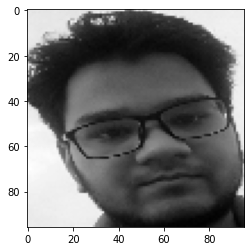

In [ ]:
plt.imshow(img_gray,cmap='gray')

In [ ]:
mykeypoints = model.predict(imggray)[0]

In [ ]:
mykeypoints.shape

(30,)